## Students Math Class 

### `Relation between Binomial  and Quantitative variable`

Question:
1. `Suppose we want to know: Is a student’s score (G3) associated with their school (school)? If so, then knowing what school a student attends gives us information about what their score is likely to be. For example, maybe students at one of the schools consistently score higher than students at the other school.`

Details:

1. `school`: the school each student attends, Gabriel Periera ('GP') or Mousinho da Silveria ('MS')
2. `address`: the location of the student’s home ('U' for urban and 'R' for rural)
3. `absences`: the number of times the student was absent during the school year
4. `Mjob`: the student’s mother’s job industry
5. `Fjob`: the student’s father’s job industry
6. `G3`: the student’s score on a math assessment, ranging from 0 to 20


#### Inspection and cleaning

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
students2 = pd.read_csv('Students2.csv')

In [5]:
students2.shape

(395, 6)

In [4]:
students2.head()

,school,address,absences,Mjob,Fjob,G3
0,GP,U,6,at_home,teacher,6
1,GP,U,4,at_home,other,6
2,GP,U,10,at_home,other,10
3,GP,U,2,health,services,15
4,GP,U,4,other,other,10


In [7]:
students2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   school    395 non-null    object
 1   address   395 non-null    object
 2   absences  395 non-null    int64 
 3   Mjob      395 non-null    object
 4   Fjob      395 non-null    object
 5   G3        395 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 18.6+ KB


In [8]:
students2.describe(include='all')

,school,address,absences,Mjob,Fjob,G3
count,395,395,395.000000,395,395,395.000000
unique,2,2,NaN,5,5,NaN
top,GP,U,NaN,other,other,NaN
freq,349,307,NaN,141,217,NaN
mean,NaN,NaN,5.708861,NaN,NaN,10.415190
std,NaN,NaN,8.003096,NaN,NaN,4.581443
min,NaN,NaN,0.000000,NaN,NaN,0.000000
25%,NaN,NaN,0.000000,NaN,NaN,8.000000
50%,NaN,NaN,4.000000,NaN,NaN,11.000000
75%,NaN,NaN,8.000000,NaN,NaN,14.000000


## `Is score(G3, Quantitative/Ordinal) has relation to school (GP and MS, Binomial)?`

groupby school then get the mean value of G3 in each school

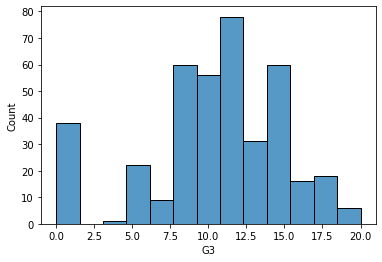

In [23]:
sns.histplot(x='G3', data = students2)
plt.show()
plt.close()

#### `Clean the dataframe first by removing zero value (drop students) in our G3.`

In [6]:
student_G3_no_zero = students2[students2.G3 > 0]
# student_G3_no_zero

### `Just curious, wheres these zero's came from? at what school?`

In [44]:
student_G3_all_zero = students2[students2.G3 == 0]
student_G3_all_zero.school.value_counts()

GP    34
MS     4
Name: school, dtype: int64

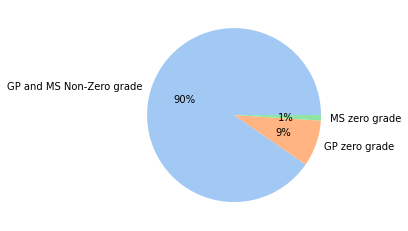

In [57]:
data = [ len(student2) - len(student_G3_all_zero), 34, 4]
labels = ['GP and MS Non-Zero grade', 'GP zero grade', 'MS zero grade',]
colors = sns.color_palette('pastel')[0:5]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

### 10% of both schools has a zero G3.


## `Let's now back to answer our question.. ;)`

### `school vs. G3` 
we will use our student_G3_no_zero in this analysis

In [59]:
GP_record = student_G3_no_zero[student_G3_no_zero.school == 'GP']
MS_record = student_G3_no_zero[student_G3_no_zero.school == 'MS']

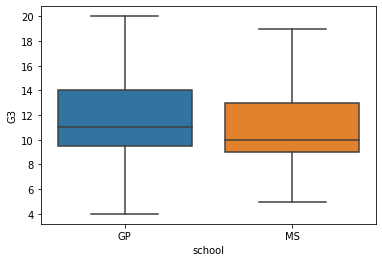

In [63]:
sns.boxplot(data = student_G3_no_zero, x = 'school', y = 'G3')
plt.show()

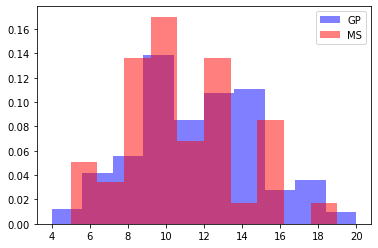

In [70]:
# Density adjust both population even if the two are not equal in numbers
plt.hist(GP_record.G3, color="blue", label="GP", density=True, alpha=0.5)
plt.hist(MS_record.G3, color="red", label="MS", density=True, alpha=0.5)
plt.legend()
plt.show()

In [71]:
# difference in mean
GP_record.G3.mean() - MS_record.G3.mean() 

0.8365079365079353

### `Mean are almost the same`

In [73]:
# difference in median
GP_record.G3.median() - MS_record.G3.median() 

1.0